In [1]:
import os
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Log Data Extraction

## server_access log

In [2]:
# Extract the IP address.
def extract_ip_address(log_line):
    if "::1 - -"  not in log_line:
        ip_address = log_line.split(' - -')[0]
        return ip_address
    else:
        return 'request was made from the same machine'

In [3]:
# Extract date and time.
def extract_date_time(log_line):
    if "::1 - -"  not in log_line:
        date_time = log_line.split(' - -')[1].split('"')[0]
        return date_time
    else:
        return 'request was made from the same machine'

In [4]:
# Extract method of request.
def extract_method_of_request(log_line):
    if "::1 - -"  not in log_line:
        method_of_request = log_line.split('"')[1]
        return method_of_request
    else:
        return 'request was made from the same machine'

In [5]:
# Extract url of request.
def extract_url(log_line):
    if "::1 - -"  not in log_line:
        request_url = log_line.split('"')[1].split(' ')[1]
        return request_url
    else:
        return 'request was made from the same machine'

In [6]:
# Extract http status code of request.
def extract_http_status_code(log_line):
    if "::1 - -"  not in log_line:
        status_code = log_line.split('"')[2]
        return status_code
    else:
        return 'request was made from the same machine'

In [7]:
# Extract number of bytes send in response
def extract_number_of_bytes_send_in_response(log_line):
    if "::1 - -"  not in i:
        number_of_bytes_send_in_respond = log_line.split(' - -')[1].split('"')[2].split(' ')[2]
        return number_of_bytes_send_in_respond
    else:
        return 'request was made from the same machine'

In [8]:
# Extract referer header.
def extract_referer_header(log_line):
    if "::1 - -"  not in log_line:
        referer_header = log_line.split(' - -')[1].split('"')[3]
        return referer_header
    else:
        return 'request was made from the same machine'

In [9]:
# Extract user agent header.
def extract_user_agent_header(log_line):
    if "::1 - -"  not in log_line:
        user_agent_header = log_line.split(' - -')[1].split('"')[-2]
        return user_agent_header
    else:
        return 'request was made from the same machine'

In [10]:
def get_access_log_data(data_dir):
    sub_dir_list=[]
    ip_address=[]
    date_time = []
    request_method=[]
    #request_url = []
    request_http_status_code = []
    #num_of_bytes_in_response = []
    referer_head=[]
    user_head = []
    for sub_dir in os.listdir(data_dir):
        sub_dir_path = os.path.join(data_dir,sub_dir)
        sub_dir_list.append(sub_dir_path)
    for file_path in sub_dir_list:
        with open(file_path, 'r') as f:
            data= f.readlines()
            ip_addrs=[extract_ip_address(i) for i in data]
            date_list=[extract_date_time(i) for i in data]
            request_methd=[extract_method_of_request(i) for i in data]
            #request_url_list=[extract_url(i) for i in data]
            request_status_code=[extract_http_status_code(i) for i in data ]
            #num_of_bytes=[extract_number_of_bytes_send_in_response(i) for i in data]
            referer=[extract_referer_header(i) for i in data]
            user_header=[extract_user_agent_header(i) for i in data]
            ip_address.append(ip_addrs)
            date_time.append(date_list)
            request_method.append(request_methd)
            #request_url.append(request_url_list)
            request_http_status_code.append(request_status_code)
            #num_of_bytes_in_response.append(num_of_bytes)
            referer_head.append(referer)
            user_head.append(user_header)
    ip=[ip for i in ip_address for ip in i]
    dt = [date for i in date_time for date in i]
    r_method=[rmethod for i in request_method for rmethod in i]
    r_status=[status for i in request_http_status_code for status in i]
    referer_agent=[refer for i in referer_head for refer in i ]
    user_agent = [ user for i in user_head for user in i]
    data= {'Ip_address':ip, 'Date_Time':dt,'Method_of_request':r_method,'Status_of_request': r_status, 'Referer_Header':referer_agent, 'User_Header':user_agent}
    df=pd.DataFrame(data)
    return df

        
            
        

In [1]:
#
access_data_dir='C:\\Users\\User\\Desktop\\cyber\\data\\access_log_data'

In [12]:
access_log_data=get_access_log_data(access_data_dir)

In [13]:
access_log_data.head()

,Ip_address,Date_Time,Method_of_request,Status_of_request,Referer_Header,User_Header
0,192.168.10.190,[29/Feb/2020:00:00:02 +0000],GET /login.php HTTP/1.1,200 2532,-,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....
1,192.168.10.4,[29/Feb/2020:00:00:09 +0000],POST /services/ajax.php/kronolith/listTopTags ...,200 402,http://mail.cup.com/kronolith/,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...
2,192.168.10.190,[29/Feb/2020:00:00:12 +0000],POST /login.php HTTP/1.1,302 601,http://mail.cup.com/login.php,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....
3,192.168.10.190,[29/Feb/2020:00:00:13 +0000],GET /services/portal/ HTTP/1.1,200 7696,http://mail.cup.com/login.php,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....
4,192.168.10.190,[29/Feb/2020:00:00:14 +0000],GET /themes/default/graphics/head-bg.png HTTP/1.1,200 380,http://mail.cup.com/themes/default/screen.css,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....


## Error log

In [14]:
 # Get the timestamp.
def get_time_stamp(log_line):
    time_stamp = log_line.split('[:error]')[0]
    return time_stamp

In [15]:
 # Get the ip_address.
def get_ip_address(log_line):
    ip_address = log_line.split(' ')[9]
    return ip_address

In [16]:
 # Get the Process ID.
def get_PID(log_line):
    pid = log_line.split(' ')[7]
    return pid

In [17]:
 # Get the referer.
def get_referer(log_line):
    referer = log_line.split(' ')[-1]
    return referer

In [18]:
def get_error_log_data(data_dir):
    sub_dir_list=[]
    ip_address=[]
    date_time = []
    progress_id=[]
    referer_head=[]
    for sub_dir in os.listdir(data_dir):
        sub_dir_path = os.path.join(data_dir,sub_dir)
        sub_dir_list.append(sub_dir_path)
    for file_path in sub_dir_list:
        with open(file_path, 'r') as f:
            data= f.readlines()
            ip_addrs=[get_ip_address(i) for i in data]
            date_list=[get_time_stamp(i) for i in data]
            pid=[get_PID(i) for i in data]
            referer=[get_referer(i) for i in data]
            ip_address.append(ip_addrs)
            date_time.append(date_list)
            progress_id.append(pid)
            referer_head.append(referer)
    ip=[ip for i in ip_address for ip in i]
    dt = [date for i in date_time for date in i]
    p_id=[pi_d for i in progress_id for pi_d in i]
    referer_agent=[refer for i in referer_head for refer in i ]
    data= {'Ip_address':ip, 'Date_Time':dt,'PID':p_id,'Referer_Header':referer_agent}
    df=pd.DataFrame(data)
    return df

        
            
        

In [2]:
# 
error_data_dir='C:\\Users\\User\\Desktop\\cyber\\data\\error_log_data'

In [20]:
error_log_data=get_error_log_data(error_data_dir)

In [21]:
error_log_data.head()

,Ip_address,Date_Time,PID,Referer_Header
0,192.168.10.4:55308],[Sun Mar 01 06:28:15.983231 2020],32548],http://mail.cup.com/nag/\n
1,192.168.10.4:55308],[Sun Mar 01 06:28:15.984200 2020],32548],http://mail.cup.com/nag/\n
2,192.168.10.4:55308],[Sun Mar 01 06:28:15.984863 2020],32548],http://mail.cup.com/nag/\n
3,192.168.10.4:55308],[Sun Mar 01 06:28:15.985763 2020],32548],http://mail.cup.com/nag/\n
4,192.168.10.4:55308],[Sun Mar 01 06:28:15.986326 2020],32548],http://mail.cup.com/nag/\n


## User log

In [22]:
def extract_date(log_line):
    if not log_line.startswith(tuple([' <_','Message:'])):
        if 'Next state:' in log_line:
            date=log_line.split('.')[0]
            return date
        else:
            pass
    else:
        pass

In [23]:
def extract_id(log_line):
    if not log_line.startswith(tuple([' <_','Message:'])):
        if 'Next state:' in log_line:
            time_id=log_line.split('.')[1].split(' ')[0]
            return time_id
        else:
            pass
    else:
        pass

In [24]:
def extract_next_state(log_line):
    if not log_line.startswith(tuple([' <_','Message:'])):
         if 'Next state:' in log_line:
            nt_state=log_line.split('Next state:')[-1]
            return nt_state
         else:
            pass
    else:
        pass

In [25]:
def extract_user(sub_dir,log_line):
    if not log_line.startswith(tuple([' <_','Message:'])):
        if 'Next state:' in log_line:
            user=sub_dir
            return user
        else:
            pass
    else:
        pass
    

In [26]:
def get_user_data(data_dir):
    date_lg= []
    timeid = []
    nxt_state = []
    user_list = []
    for sub_dir in os.listdir(data_dir):
        date_log= []
        time_id = []
        nxt_stage = []
        us_er=[]
        user=sub_dir
        sub_dir_path = os.path.join(data_dir,sub_dir)
        for file in os.listdir(sub_dir_path):
            file_path = os.path.join(sub_dir_path,file)
            with open(file_path, 'r') as f:
                data= f.readlines()
                date=[extract_date(i) for i in data]
                date_id=[extract_id(i) for i in data]
                next_state=[extract_next_state(i) for i in data]
                userlist=[extract_user(sub_dir,i) for i in data]
                date_log.append(date)
                time_id.append(date_id)
                nxt_stage.append(next_state)
                us_er.append(userlist)

        dt = [d for i in date_log for d in i]
        dt_id=[d_id for i in time_id for d_id in i]
        nx_state=[ns for i in nxt_stage for ns in i]
        web_user=[us for i in us_er for us in i]
        date_lg.append(dt)
        timeid.append(dt_id)
        nxt_state.append(nx_state)
        user_list.append(web_user)
    date_lg = [d for i in date_lg for d in i]
    timeid=[d_id for i in timeid for d_id in i]
    nxt_state=[ns for i in nxt_state for ns in i]
    user_list=[u for i in user_list for u in i]

    user_data= {'Date_Time':date_lg,'Date_id':timeid,'Next_State': nxt_state,'User':user_list}
    df=pd.DataFrame(user_data)
    return df
    #len(date_lg),len(timeid),len(nxt_state)
   

In [27]:
# 'C:\\Users\\User\\Desktop\\cyber\\data\\user_data'
user_data_dir='C:\\Users\\Hauwa Baba\\Desktop\\cyber\\data\\user_data'

In [28]:
user_data = get_user_data(user_data_dir)

In [29]:
user_data.head()

,Date_Time,Date_id,Next_State,User
0,None,None,None,None
1,2020-02-28 19:14:41,123111,Login\n,user-0
2,2020-02-28 19:14:57,244144,Personal Preferences\n,user-0
3,2020-02-28 19:15:12,950956,Mail Delete Preferences\n,user-0
4,2020-02-28 19:16:43,522902,Home\n,user-0


## Attack log

In [30]:
def extract_attack_date(log_line):
    date=log_line.split('UTC 2020')[0]
    return date

In [31]:
def extract_attack_status(log_line):
    status=log_line.split('UTC 2020')[1]
    return status

In [32]:
def extract_attack_user(sub_dir,log_line):
    user=sub_dir
    return user

In [33]:
def get_attack_data(data_dir):
    date_lg= []
    status = []
    user_list = []
    for sub_dir in os.listdir(data_dir):
        date_log= []
        stat = []
        us_er=[]
        user=sub_dir
        sub_dir_path = os.path.join(data_dir,sub_dir)
        for file in os.listdir(sub_dir_path):
            file_path = os.path.join(sub_dir_path,file)
            with open(file_path, 'r') as f:
                data= f.readlines()
                date=[extract_attack_date(i) for i in data]
                attack_stat=[extract_attack_status(i) for i in data]
                userlist=[extract_attack_user(sub_dir,i) for i in data]
                date_log.append(date)
                stat.append(attack_stat)
                us_er.append(userlist)

        dt = [d for i in date_log for d in i]
        attk_stat=[s for i in stat for s in i]
        web_user=[us for i in us_er for us in i]
        date_lg.append(dt)
        status.append(attk_stat)
        user_list.append(web_user)
    date_lg = [d for i in date_lg for d in i]
    status=[s for i in status for s in i]
    user_list=[u for i in user_list for u in i]
    user_data= {'Date_Time':date_lg,'Status':status,'User':user_list}
    df=pd.DataFrame(user_data)
    return df
    #len(date_lg),len(timeid),len(nxt_state)
   

In [34]:
# 'C:\\Users\\User\\Desktop\\cyber\\data\\attack_data'
attack_data_dir= 'C:\\Users\\Hauwa Baba\\Desktop\\cyber\\data\\attack_data'

In [35]:
attack_data=get_attack_data(attack_data_dir)

In [36]:
attack_data.head()

,Date_Time,Status,User
0,Wed Mar 4 12:37:51,okay-upload-webshell\n,user-4
1,Wed Mar 4 12:37:51,success\n,user-4
2,Wed Mar 4 12:38:05,okay-curl\n,user-4
3,Wed Mar 4 12:38:05,success\n,user-4
4,Wed Mar 4 13:51:47,nmap\n,user-4


# Log Data Cleaning and Preparation

## server_access log

In [37]:
access_log_data.head()

,Ip_address,Date_Time,Method_of_request,Status_of_request,Referer_Header,User_Header
0,192.168.10.190,[29/Feb/2020:00:00:02 +0000],GET /login.php HTTP/1.1,200 2532,-,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....
1,192.168.10.4,[29/Feb/2020:00:00:09 +0000],POST /services/ajax.php/kronolith/listTopTags ...,200 402,http://mail.cup.com/kronolith/,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...
2,192.168.10.190,[29/Feb/2020:00:00:12 +0000],POST /login.php HTTP/1.1,302 601,http://mail.cup.com/login.php,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....
3,192.168.10.190,[29/Feb/2020:00:00:13 +0000],GET /services/portal/ HTTP/1.1,200 7696,http://mail.cup.com/login.php,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....
4,192.168.10.190,[29/Feb/2020:00:00:14 +0000],GET /themes/default/graphics/head-bg.png HTTP/1.1,200 380,http://mail.cup.com/themes/default/screen.css,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....


In [38]:
access_log_data.Ip_address.unique()

array(['192.168.10.190', '192.168.10.4',
       'request was made from the same machine', '192.168.10.238',
       '192.168.10.200', '192.168.10.18', '192.168.10.98',
       '192.168.10.161', '192.168.10.185', '192.168.10.81',
       '192.168.10.130', '192.168.10.194'], dtype=object)

In [39]:
access_data=access_log_data[access_log_data.Ip_address!='request was made from the same machine'].reset_index(drop=True)

In [40]:
access_data.Status_of_request[11].split(' ')


['', '200', '8808', '']

In [41]:
def status_code(data):
    status=data[:3]
    return status

In [42]:
def respond_byte(data):
    res_byte=data[3:]
    return res_byte

In [43]:
def request_method(data):
    request_method=data.split(' ')[0]
    return request_method

In [44]:
def request_url(data):
    url=data.split(' ')[-2]
    return url

In [45]:
def remove_bracket(data):
    data=data.replace('[',' ')
    data=data.replace(']',' ')
    return data
    

In [46]:
access_data.Status_of_request.nunique()

12737

In [47]:
access_data[access_data.Method_of_request=='<script>alert(1)</script>']

,Ip_address,Date_Time,Method_of_request,Status_of_request,Referer_Header,User_Header


In [48]:
access_data.Status_of_request

0           200 2532 
1            200 402 
2            302 601 
3           200 7696 
4            200 380 
             ...     
483827     200 19513 
483828       302 492 
483829     200 21290 
483830     200 10442 
483831      200 3843 
Name: Status_of_request, Length: 483832, dtype: object

In [49]:
def remove_space(data):
    data=data.replace('  ',"")
    data=data.replace(' ',"")
    return data

In [50]:
access_data.Date_Time=access_data.Date_Time.apply(lambda x:remove_bracket(x))
access_data.Date_Time=access_data.Date_Time.apply(lambda x:remove_space(x))

In [51]:
access_data['Request_Method']=access_data.Method_of_request.apply(lambda x:request_method(x))
access_data['Request_status']=access_data.Status_of_request.apply(lambda x:remove_space(x))
access_data.Request_status=access_data.Request_status.apply(lambda x:status_code(x))
access_data['Response_byte']=access_data.Status_of_request.apply(lambda x:remove_space(x))
access_data.Response_byte=access_data.Response_byte.apply(lambda x:respond_byte(x))


In [52]:
access_data.head()

,Ip_address,Date_Time,Method_of_request,Status_of_request,Referer_Header,User_Header,Request_Method,Request_status,Response_byte
0,192.168.10.190,29/Feb/2020:00:00:02+0000,GET /login.php HTTP/1.1,200 2532,-,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....,GET,200,2532
1,192.168.10.4,29/Feb/2020:00:00:09+0000,POST /services/ajax.php/kronolith/listTopTags ...,200 402,http://mail.cup.com/kronolith/,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,POST,200,402
2,192.168.10.190,29/Feb/2020:00:00:12+0000,POST /login.php HTTP/1.1,302 601,http://mail.cup.com/login.php,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....,POST,302,601
3,192.168.10.190,29/Feb/2020:00:00:13+0000,GET /services/portal/ HTTP/1.1,200 7696,http://mail.cup.com/login.php,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....,GET,200,7696
4,192.168.10.190,29/Feb/2020:00:00:14+0000,GET /themes/default/graphics/head-bg.png HTTP/1.1,200 380,http://mail.cup.com/themes/default/screen.css,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....,GET,200,380


In [53]:
access_data.columns

Index(['Ip_address', 'Date_Time', 'Method_of_request', 'Status_of_request',
       'Referer_Header', 'User_Header', 'Request_Method', 'Request_status',
       'Response_byte'],
      dtype='object')

In [54]:
access_data=access_data[['Ip_address', 'Date_Time', 'Method_of_request', 'Request_Method', 'Request_status','Referer_Header', 'User_Header']]

In [55]:
access_data.Date_Time=access_data.Date_Time.apply(lambda x:x.split(':')[0])

In [56]:
access_data['Date_Time']=pd.to_datetime(access_data['Date_Time'])

In [57]:
access_data.Request_Method.unique()

array(['GET', 'POST', '-', 'HEAD', 'PUT', 'OPTIONS', 'DEBUG', 'PROPFIND',
       'TRACE', 'TRACK', 'get', 'INDEX', 'SEARCH',
       '<script>alert(1)</script>'], dtype=object)

In [58]:
access_data.Referer_Header.replace('-','Anonymous Referer', inplace = True)

In [59]:
access_data.Request_Method.replace('-','Anonymous Referer', inplace = True)

In [60]:
access_data.head()

,Ip_address,Date_Time,Method_of_request,Request_Method,Request_status,Referer_Header,User_Header
0,192.168.10.190,2020-02-29,GET /login.php HTTP/1.1,GET,200,Anonymous Referer,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....
1,192.168.10.4,2020-02-29,POST /services/ajax.php/kronolith/listTopTags ...,POST,200,http://mail.cup.com/kronolith/,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...
2,192.168.10.190,2020-02-29,POST /login.php HTTP/1.1,POST,302,http://mail.cup.com/login.php,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....
3,192.168.10.190,2020-02-29,GET /services/portal/ HTTP/1.1,GET,200,http://mail.cup.com/login.php,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....
4,192.168.10.190,2020-02-29,GET /themes/default/graphics/head-bg.png HTTP/1.1,GET,200,http://mail.cup.com/themes/default/screen.css,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....


In [61]:
access_data.Request_Method=access_data.Request_Method.apply(lambda x: x.upper())


In [62]:
request_dict={'GET':'Safe', 'POST':'Safe', 'ANONYMOUS REFERER':'Suspected attack', 'HEAD':'Safe', 'PUT':'Malicious', 'OPTIONS':'Safe', 'DEBUG':'Malicious', 'PROPFIND':'Suspected attack', 'TRACE':'Suspected attack', 'TRACK':'Suspected attack', 'INDEX':'Suspected attack', 'SEARCH':'Suspected attack','<SCRIPT>ALERT(1)</SCRIPT>':'Suspected attack'}

access_data['Security_status']=access_data.Request_Method.map(request_dict)

#access_data.Security_status.unique()


In [63]:
#Check IP distribution: Identify IPs with the highest access frequency and flag those with abnormal behavior

unsafe_stat =['Suspected attack','Malicious']
unsafe_access=access_data[access_data.Security_status.isin(unsafe_stat)].reset_index(drop=True)

ip_with_unsafe_access=unsafe_access.groupby(['Ip_address','Security_status'])['Ip_address'].count().to_frame().rename(columns={'Ip_address':'Counts'}).reset_index()

## Error data log

In [64]:
error_log_data.head()

,Ip_address,Date_Time,PID,Referer_Header
0,192.168.10.4:55308],[Sun Mar 01 06:28:15.983231 2020],32548],http://mail.cup.com/nag/\n
1,192.168.10.4:55308],[Sun Mar 01 06:28:15.984200 2020],32548],http://mail.cup.com/nag/\n
2,192.168.10.4:55308],[Sun Mar 01 06:28:15.984863 2020],32548],http://mail.cup.com/nag/\n
3,192.168.10.4:55308],[Sun Mar 01 06:28:15.985763 2020],32548],http://mail.cup.com/nag/\n
4,192.168.10.4:55308],[Sun Mar 01 06:28:15.986326 2020],32548],http://mail.cup.com/nag/\n


In [65]:
error_log_data.Ip_address=error_log_data.Ip_address.apply(lambda x:remove_bracket(x))
error_log_data.Ip_address=error_log_data.Ip_address.apply(lambda x:x.split(':')[0])

In [66]:
error_log_data.Date_Time=error_log_data.Date_Time.apply(lambda x:remove_bracket(x))
error_log_data.Date_Time=error_log_data.Date_Time.apply(lambda x:x.split('06:')[0])

In [67]:
error_log_data.PID=error_log_data.PID.apply(lambda x:remove_bracket(x))

In [68]:
error_log_data

,Ip_address,Date_Time,PID,Referer_Header
0,192.168.10.4,Sun Mar 01,32548,http://mail.cup.com/nag/\n
1,192.168.10.4,Sun Mar 01,32548,http://mail.cup.com/nag/\n
2,192.168.10.4,Sun Mar 01,32548,http://mail.cup.com/nag/\n
3,192.168.10.4,Sun Mar 01,32548,http://mail.cup.com/nag/\n
4,192.168.10.4,Sun Mar 01,32548,http://mail.cup.com/nag/\n
...,...,...,...,...
636,192.168.10.130,Thu Mar 05,14982,http://mail.spiral.com/turba/\n
637,192.168.10.130,Thu Mar 05,14982,http://mail.spiral.com/turba/\n
638,192.168.10.130,Thu Mar 05,14982,http://mail.spiral.com/turba/\n
639,192.168.10.130,Thu Mar 05,14982,http://mail.spiral.com/turba/\n


## user_data 

In [69]:
user_data.Date_Time[0]

In [70]:
user_data=user_data.fillna(0)

In [71]:
user_data=user_data[user_data.Date_Time!=0].reset_index(drop=True)

In [72]:
user_data.Date_Time[0]

'2020-02-28 19:14:41'

In [73]:
user_data.Date_Time=user_data.Date_Time.apply(lambda x:x.split(' ')[0])

In [74]:
user_data

,Date_Time,Date_id,Next_State,User
0,2020-02-28,123111,Login\n,user-0
1,2020-02-28,244144,Personal Preferences\n,user-0
2,2020-02-28,950956,Mail Delete Preferences\n,user-0
3,2020-02-28,522902,Home\n,user-0
4,2020-02-28,807088,MenuBarSelection\n,user-0
...,...,...,...,...
476453,2020-03-06,632661,NewCalendarEvent\n,user-9
476454,2020-03-06,658098,Home\n,user-9
476455,2020-03-06,526480,MenuBarSelection\n,user-9
476456,2020-03-06,526653,Logout\n,user-9


In [75]:
user_data['Date_Time']=pd.to_datetime(user_data['Date_Time'])

In [76]:
user_data.head()

,Date_Time,Date_id,Next_State,User
0,2020-02-28,123111,Login\n,user-0
1,2020-02-28,244144,Personal Preferences\n,user-0
2,2020-02-28,950956,Mail Delete Preferences\n,user-0
3,2020-02-28,522902,Home\n,user-0
4,2020-02-28,807088,MenuBarSelection\n,user-0


In [77]:
## Attack Data

In [78]:
attack_data.head()

,Date_Time,Status,User
0,Wed Mar 4 12:37:51,okay-upload-webshell\n,user-4
1,Wed Mar 4 12:37:51,success\n,user-4
2,Wed Mar 4 12:38:05,okay-curl\n,user-4
3,Wed Mar 4 12:38:05,success\n,user-4
4,Wed Mar 4 13:51:47,nmap\n,user-4


# Exploratory Data Analysis

In [79]:
access_data.shape, error_log_data.shape, user_data.shape, attack_data.shape

((483832, 8), (641, 4), (476458, 4), (443, 3))

## access log data

In [80]:
access_data.head()

,Ip_address,Date_Time,Method_of_request,Request_Method,Request_status,Referer_Header,User_Header,Security_status
0,192.168.10.190,2020-02-29,GET /login.php HTTP/1.1,GET,200,Anonymous Referer,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....,Safe
1,192.168.10.4,2020-02-29,POST /services/ajax.php/kronolith/listTopTags ...,POST,200,http://mail.cup.com/kronolith/,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,Safe
2,192.168.10.190,2020-02-29,POST /login.php HTTP/1.1,POST,302,http://mail.cup.com/login.php,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....,Safe
3,192.168.10.190,2020-02-29,GET /services/portal/ HTTP/1.1,GET,200,http://mail.cup.com/login.php,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....,Safe
4,192.168.10.190,2020-02-29,GET /themes/default/graphics/head-bg.png HTTP/1.1,GET,200,http://mail.cup.com/themes/default/screen.css,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....,Safe


In [81]:
access_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483832 entries, 0 to 483831
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Ip_address         483832 non-null  object        
 1   Date_Time          483832 non-null  datetime64[ns]
 2   Method_of_request  483832 non-null  object        
 3   Request_Method     483832 non-null  object        
 4   Request_status     483832 non-null  object        
 5   Referer_Header     483832 non-null  object        
 6   User_Header        483832 non-null  object        
 7   Security_status    483832 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 29.5+ MB


## Exploring Access Patterns
- Analyze request methods: Count the occurrences of different request methods (GET, POST, etc.).
- Study request statuses: Investigate the distribution of response status codes (e.g., 200 OK, 404 Not Found).
- Examine access over time: Plot the access frequency over time to identify spikes or anomalies

In [82]:
access_data.head(1)

,Ip_address,Date_Time,Method_of_request,Request_Method,Request_status,Referer_Header,User_Header,Security_status
0,192.168.10.190,2020-02-29,GET /login.php HTTP/1.1,GET,200,Anonymous Referer,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....,Safe


In [83]:
log_acess_over_time = access_data.groupby('Date_Time')['Ip_address'].count().to_frame().rename(columns={'Ip_address':'Counts'}).reset_index()

In [84]:
log_acess_over_time

,Date_Time,Counts
0,2020-02-29,67861
1,2020-03-01,70201
2,2020-03-02,78047
3,2020-03-03,76021
4,2020-03-04,103544
5,2020-03-05,82281
6,2020-03-06,5877


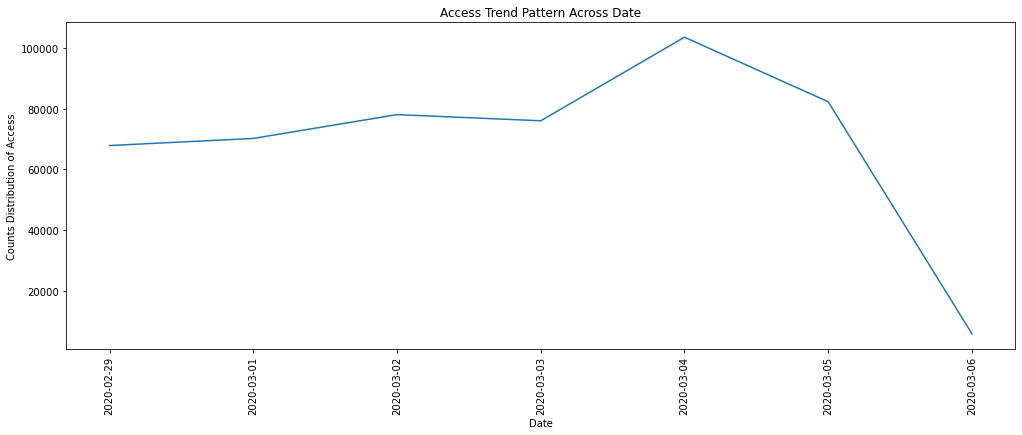

In [85]:
plt.figure(figsize = (17,6))
ax=sns.lineplot(x=log_acess_over_time['Date_Time'],y=log_acess_over_time['Counts'])
plt.title('Access Trend Pattern Across Date')
plt.xlabel('Date')
plt.ylabel('Counts Distribution of Access')
plt.xticks(rotation = 90);
plt.show()

In [86]:
unique_IP_distribution = access_data.groupby('Ip_address')['Ip_address'].count().to_frame().rename(columns={'Ip_address':'Counts'}).reset_index().sort_values("Counts", axis = 0, ascending = False, na_position ='last').reset_index(drop = True)

In [87]:
unique_IP_distribution

,Ip_address,Counts
0,192.168.10.18,146854
1,192.168.10.185,71334
2,192.168.10.190,60664
3,192.168.10.130,48548
4,192.168.10.81,40499
5,192.168.10.238,40248
6,192.168.10.4,28484
7,192.168.10.98,17798
8,192.168.10.200,12751
9,192.168.10.194,8642


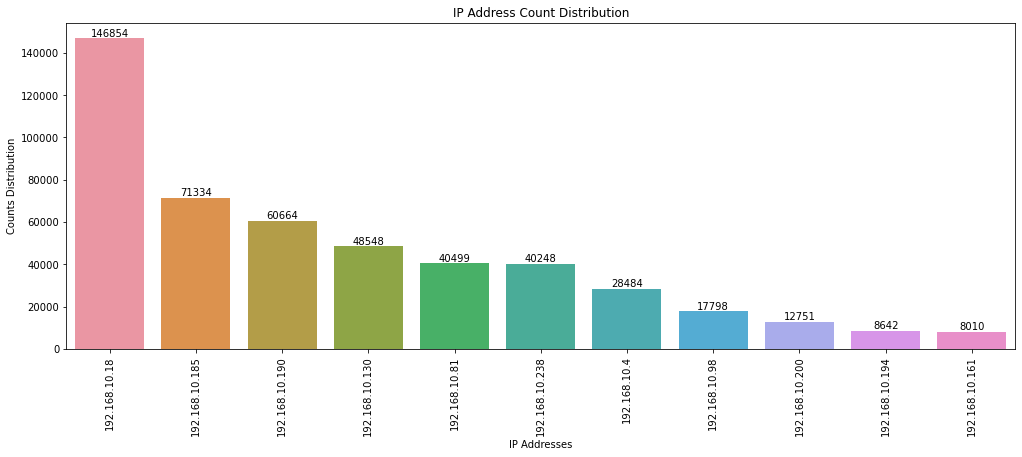

In [88]:
plt.figure(figsize = (17,6))
ax=sns.barplot(x=unique_IP_distribution['Ip_address'],y=unique_IP_distribution['Counts'])
ax.bar_label(ax.containers[0])
plt.title('IP Address Count Distribution')
plt.xlabel('IP Addresses')
plt.ylabel('Counts Distribution')
plt.xticks(rotation = 90);
plt.show()

In [89]:
request_method_df = access_data.groupby('Request_Method')['Request_Method'].count().to_frame().rename(columns={'Request_Method':'Counts'}).reset_index().sort_values("Counts", axis = 0, ascending = False, na_position ='last').reset_index(drop = True)

In [90]:
request_method_df.head()

,Request_Method,Counts
0,GET,326678
1,POST,157087
2,OPTIONS,12
3,HEAD,8
4,TRACE,8


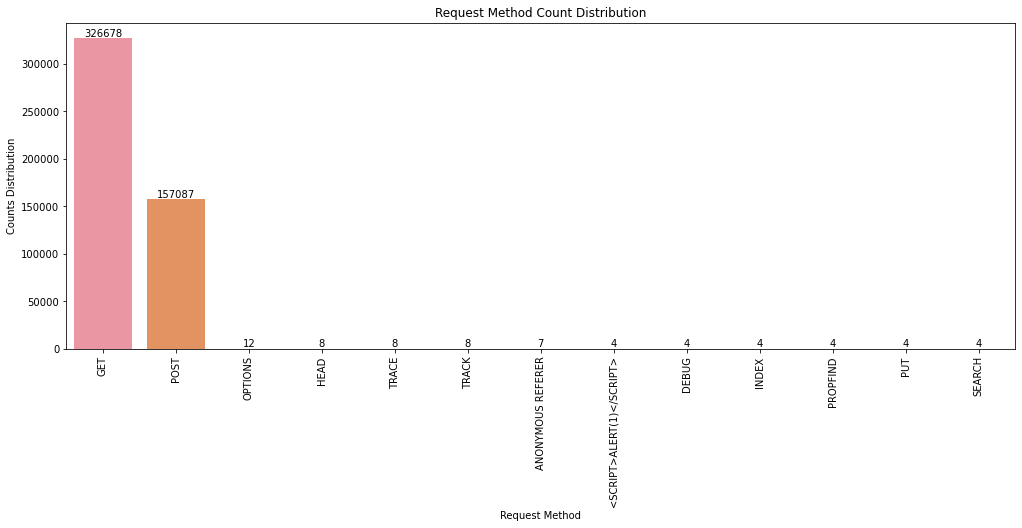

In [91]:
plt.figure(figsize = (17,6))
ax=sns.barplot(x=request_method_df['Request_Method'],y=request_method_df['Counts'])
ax.bar_label(ax.containers[0])
plt.title('Request Method Count Distribution')
plt.xlabel('Request Method')
plt.ylabel('Counts Distribution')
plt.xticks(rotation = 90);
plt.show()

In [92]:
request_status_df=access_data.groupby('Request_status')['Request_status'].count().to_frame().rename(columns={'Request_status':'Counts'}).reset_index().sort_values("Counts", axis = 0, ascending = False, na_position ='last').reset_index(drop = True)

In [93]:
request_status_df[:10]

,Request_status,Counts
0,200,424056
1,302,42630
2,400,12577
3,304,3889
4,><s,164
5,403,160
6,404,103
7,./.,52
8,<sc,40
9,Vul,36


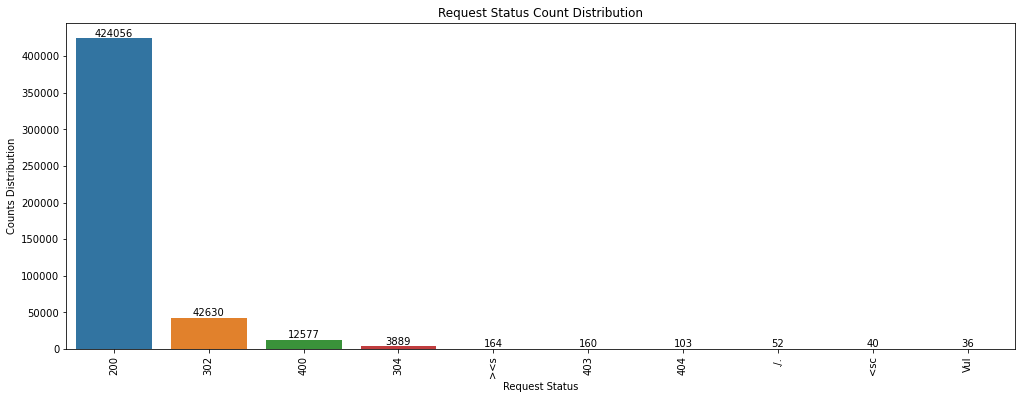

In [94]:
plt.figure(figsize = (17,6))
ax=sns.barplot(x=request_status_df['Request_status'][:10],y=request_status_df['Counts'][:10])
ax.bar_label(ax.containers[0])
plt.title('Request Status Count Distribution')
plt.xlabel('Request Status')
plt.ylabel('Counts Distribution')
plt.xticks(rotation = 90);
plt.show()

In [95]:
referer_header_df=access_data.groupby('Referer_Header')['Referer_Header'].count().to_frame().rename(columns={'Referer_Header':'Counts'}).reset_index().sort_values("Counts", axis = 0, ascending = False, na_position ='last').reset_index(drop = True)

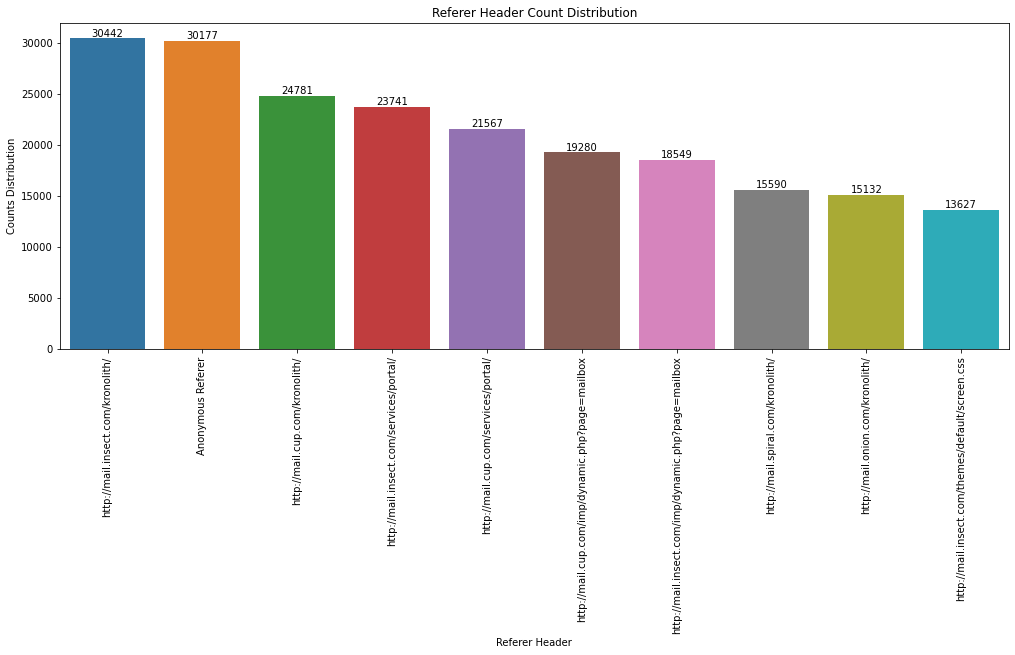

In [96]:
plt.figure(figsize = (17,6))
ax=sns.barplot(x=referer_header_df['Referer_Header'][:10],y=referer_header_df['Counts'][:10])
ax.bar_label(ax.containers[0])
plt.title('Referer Header Count Distribution')
plt.xlabel('Referer Header')
plt.ylabel('Counts Distribution')
plt.xticks(rotation = 90);
plt.show()

## Identifying Suspicious Activity
- Check IP distribution: Identify IPs with the highest access frequency and flag those with abnormal behavior (e.g., too many requests in a short period).



In [97]:
access_data.Request_Method=access_data.Request_Method.apply(lambda x: x.upper())

In [98]:
request_dict={'GET':'Safe', 'POST':'Safe', 'ANONYMOUS REFERER':'Suspected attack', 'HEAD':'Safe', 'PUT':'Malicious', 'OPTIONS':'Safe', 'DEBUG':'Malicious', 'PROPFIND':'Suspected attack', 'TRACE':'Suspected attack', 'TRACK':'Suspected attack', 'INDEX':'Suspected attack', 'SEARCH':'Suspected attack','<SCRIPT>ALERT(1)</SCRIPT>':'Suspected attack'}

In [99]:
access_data['Security_status']=access_data.Request_Method.map(request_dict)

In [100]:
access_data.Security_status.unique()

array(['Safe', 'Suspected attack', 'Malicious'], dtype=object)

- Check IP distribution: Identify IPs with the highest access frequency and flag those with abnormal behavior

In [101]:
unsafe_stat =['Suspected attack','Malicious']
unsafe_access=access_data[access_data.Security_status.isin(unsafe_stat)].reset_index(drop=True)

In [102]:
ip_with_unsafe_access=unsafe_access.groupby(['Ip_address','Security_status'])['Ip_address'].count().to_frame().rename(columns={'Ip_address':'Counts'}).reset_index()

In [103]:
ip_with_unsafe_access

,Ip_address,Security_status,Counts
0,192.168.10.18,Malicious,2
1,192.168.10.18,Suspected attack,11
2,192.168.10.185,Malicious,2
3,192.168.10.185,Suspected attack,10
4,192.168.10.238,Malicious,2
5,192.168.10.238,Suspected attack,8
6,192.168.10.4,Suspected attack,2
7,192.168.10.81,Malicious,2
8,192.168.10.81,Suspected attack,8


In [104]:
unsafe_access

,Ip_address,Date_Time,Method_of_request,Request_Method,Request_status,Referer_Header,User_Header,Security_status
0,192.168.10.4,2020-02-29,-,ANONYMOUS REFERER,408,Anonymous Referer,-,Suspected attack
1,192.168.10.4,2020-02-29,-,ANONYMOUS REFERER,408,Anonymous Referer,-,Suspected attack
2,192.168.10.238,2020-03-04,PUT /nikto-test-yAQbJ6Gp.html HTTP/1.1,PUT,400,Anonymous Referer,-,Malicious
3,192.168.10.238,2020-03-04,DEBUG / HTTP/1.1,DEBUG,400,Anonymous Referer,-,Malicious
4,192.168.10.238,2020-03-04,PROPFIND / HTTP/1.1,PROPFIND,400,Anonymous Referer,-,Suspected attack
5,192.168.10.238,2020-03-04,TRACE / HTTP/1.0,TRACE,400,Anonymous Referer,-,Suspected attack
6,192.168.10.238,2020-03-04,TRACE / HTTP/1.0,TRACE,400,Anonymous Referer,-,Suspected attack
7,192.168.10.238,2020-03-04,TRACK / HTTP/1.0,TRACK,400,Anonymous Referer,-,Suspected attack
8,192.168.10.238,2020-03-04,TRACK / HTTP/1.0,TRACK,400,Anonymous Referer,-,Suspected attack
9,192.168.10.238,2020-03-04,INDEX / HTTP/1.1,INDEX,400,Anonymous Referer,-,Suspected attack


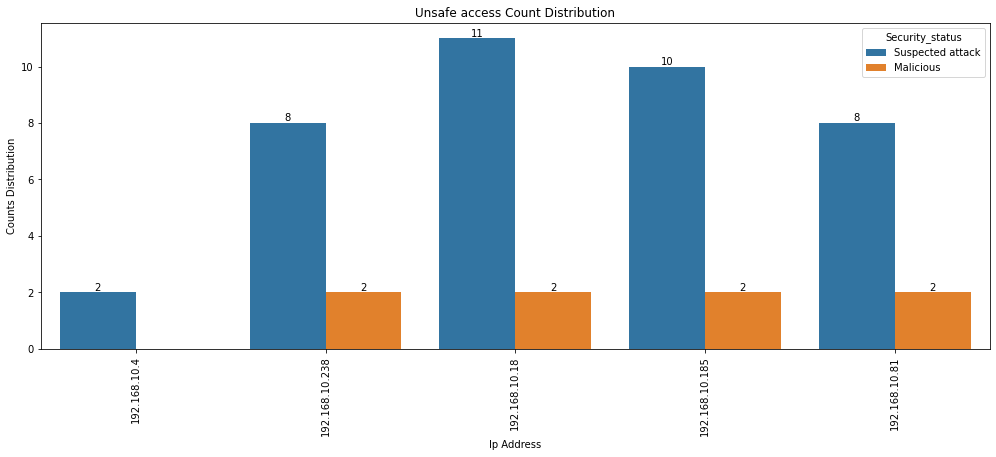

In [105]:
plt.figure(figsize = (17,6))
ax=sns.countplot(x=unsafe_access['Ip_address'], hue=unsafe_access['Security_status'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Unsafe access Count Distribution')
plt.xlabel('Ip Address')
plt.ylabel('Counts Distribution')
plt.xticks(rotation = 90);
plt.show()

In [106]:
valid_request=['200', '302', '408', '304', '400', '417', '405', '404','403','301']

In [107]:
valid_req_dict = {'200':'Successful', '302':'Found', '408':'Request Timeout:', '304':' Not Modified', '400':'Bad Request', '417':'Expectation Failed', '405':'Method Not Allowed', '404':'Not Found', '403':'Forbidden', '301':'Moved Permanently'}

In [108]:
valid_req_dict.get('200')

'Successful'

In [109]:
access_data['Class_of_Request_status']=access_data.Request_status.apply(lambda x: valid_req_dict.get(x) if x in valid_request else 'Suspicious Request' )

In [110]:
access_data.Class_of_Request_status.unique()

array(['Successful', 'Found', 'Request Timeout:', ' Not Modified',
       'Bad Request', 'Suspicious Request', 'Expectation Failed',
       'Method Not Allowed', 'Not Found', 'Forbidden',
       'Moved Permanently'], dtype=object)

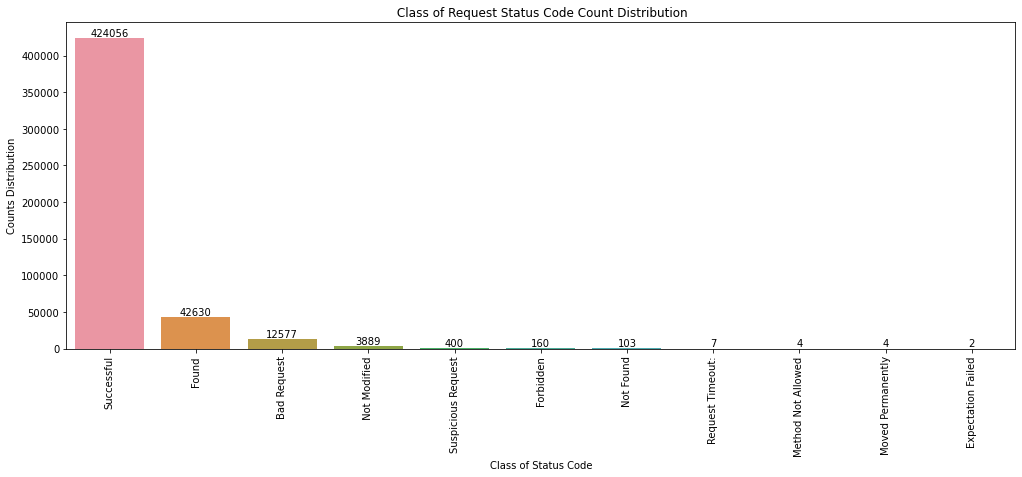

In [111]:
plt.figure(figsize = (17,6))
ax=sns.countplot(x=access_data['Class_of_Request_status'], order=access_data["Class_of_Request_status"].value_counts().index)
ax.bar_label(ax.containers[0])
#ax.bar_label(ax.containers[1])
plt.title(' Class of Request Status Code Count Distribution')
plt.xlabel('Class of Status Code')
plt.ylabel('Counts Distribution')
plt.xticks(rotation = 90);
plt.show()

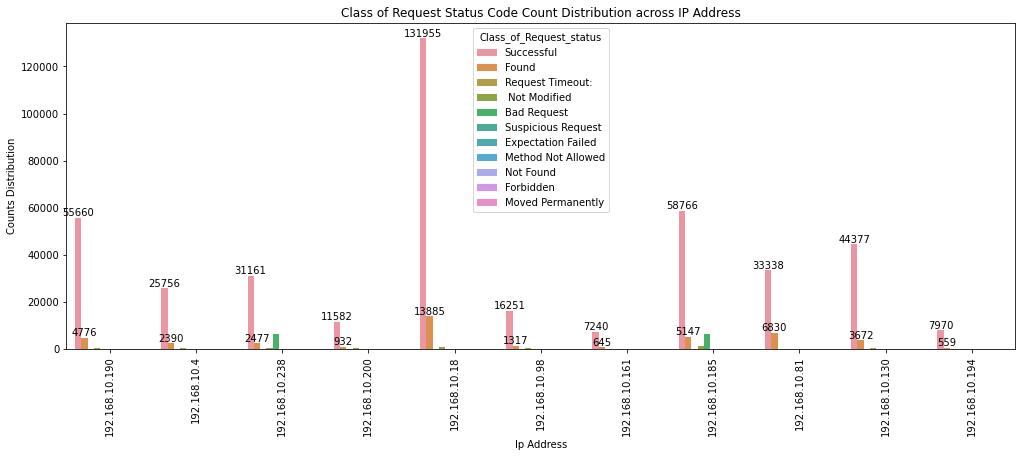

In [112]:
plt.figure(figsize = (17,6))
ax=sns.countplot(x=access_data['Ip_address'], hue=access_data['Class_of_Request_status'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Class of Request Status Code Count Distribution across IP Address')
plt.xlabel('Ip Address')
plt.ylabel('Counts Distribution')
plt.xticks(rotation = 90);
plt.show()

# Error data eda

In [113]:
error_log_data.head()

,Ip_address,Date_Time,PID,Referer_Header
0,192.168.10.4,Sun Mar 01,32548,http://mail.cup.com/nag/\n
1,192.168.10.4,Sun Mar 01,32548,http://mail.cup.com/nag/\n
2,192.168.10.4,Sun Mar 01,32548,http://mail.cup.com/nag/\n
3,192.168.10.4,Sun Mar 01,32548,http://mail.cup.com/nag/\n
4,192.168.10.4,Sun Mar 01,32548,http://mail.cup.com/nag/\n


In [114]:
unique_IP_distribution_for_error_data = error_log_data.groupby('Ip_address')['Ip_address'].count().to_frame().rename(columns={'Ip_address':'Counts'}).reset_index()

In [115]:
unique_IP_distribution_for_error_data

,Ip_address,Counts
0,192.168.10.130,72
1,192.168.10.161,18
2,192.168.10.18,209
3,192.168.10.185,74
4,192.168.10.190,54
5,192.168.10.238,20
6,192.168.10.4,18
7,192.168.10.81,158
8,192.168.10.98,18


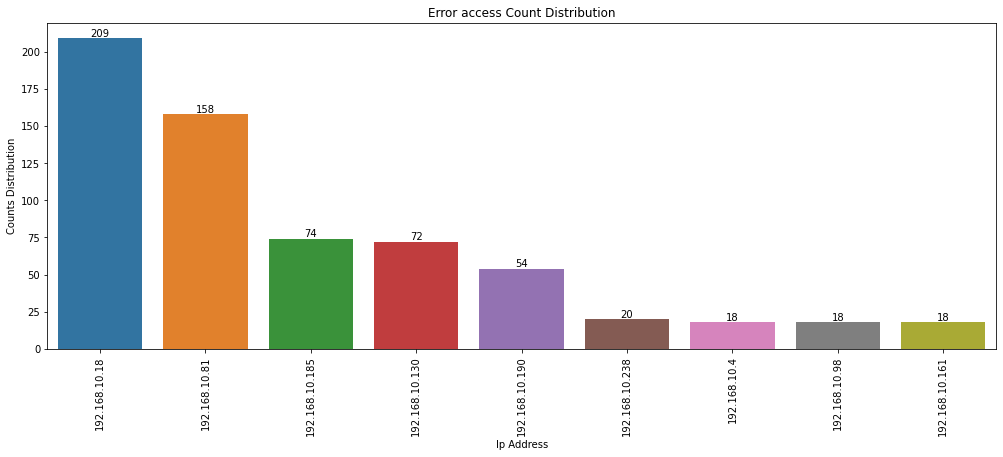

In [116]:
plt.figure(figsize = (17,6))
ax=sns.countplot(x=error_log_data['Ip_address'],  order=error_log_data["Ip_address"].value_counts().index)
ax.bar_label(ax.containers[0])
#ax.bar_label(ax.containers[1])
plt.title('Error access Count Distribution')
plt.xlabel('Ip Address')
plt.ylabel('Counts Distribution')
plt.xticks(rotation = 90);
plt.show()

## User log data

In [117]:
user_data.head()

,Date_Time,Date_id,Next_State,User
0,2020-02-28,123111,Login\n,user-0
1,2020-02-28,244144,Personal Preferences\n,user-0
2,2020-02-28,950956,Mail Delete Preferences\n,user-0
3,2020-02-28,522902,Home\n,user-0
4,2020-02-28,807088,MenuBarSelection\n,user-0


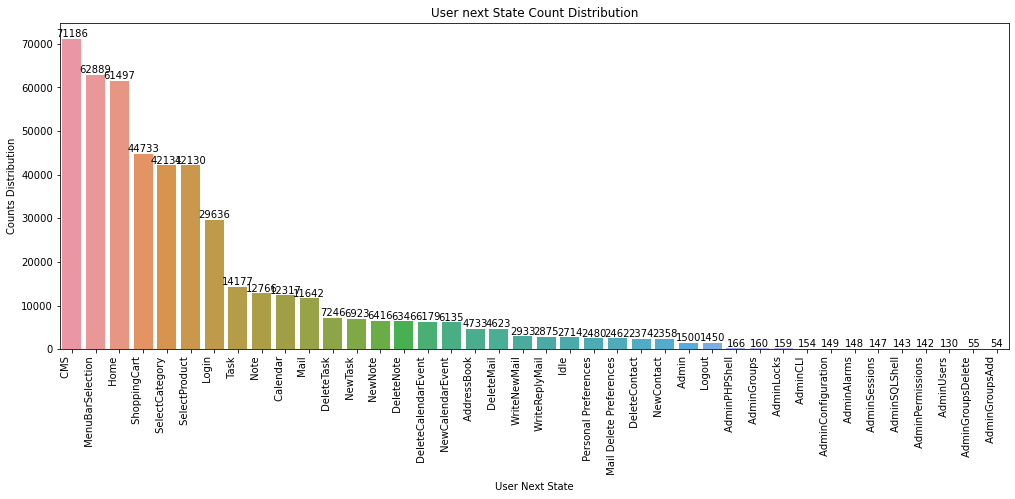

In [118]:
plt.figure(figsize = (17,6))
ax=sns.countplot(x=user_data['Next_State'], order=user_data["Next_State"].value_counts().index)
ax.bar_label(ax.containers[0])
#ax.bar_label(ax.containers[1])
plt.title('User next State Count Distribution')
plt.xlabel('User Next State')
plt.ylabel('Counts Distribution')
plt.xticks(rotation = 90);
plt.show()

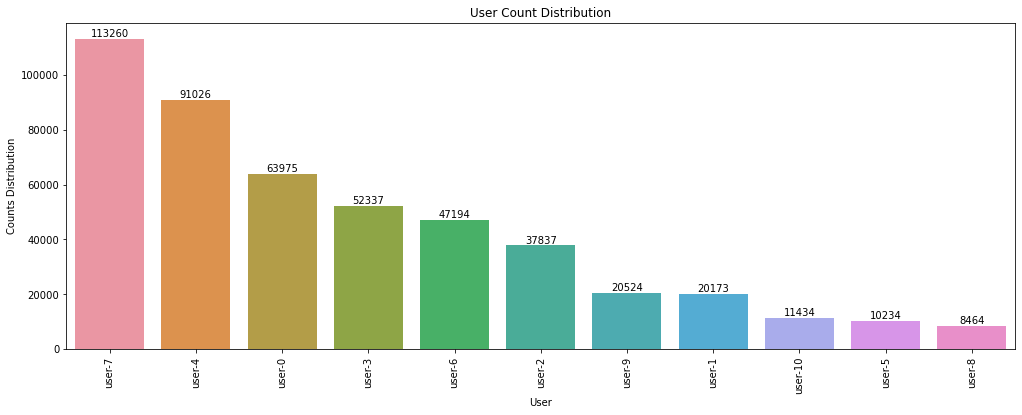

In [119]:
plt.figure(figsize = (17,6))
ax=sns.countplot(x=user_data['User'],  order=user_data["User"].value_counts().index)
ax.bar_label(ax.containers[0])
#ax.bar_label(ax.containers[1])
plt.title('User Count Distribution')
plt.xlabel('User')
plt.ylabel('Counts Distribution')
plt.xticks(rotation = 90);
plt.show()

## Exploring User Behavior:

- Analyze next state frequencies: Calculate the frequency of each "next state" (web page) to identify the most visited pages.


## Attack data eda

In [120]:
attack_data.head()

,Date_Time,Status,User
0,Wed Mar 4 12:37:51,okay-upload-webshell\n,user-4
1,Wed Mar 4 12:37:51,success\n,user-4
2,Wed Mar 4 12:38:05,okay-curl\n,user-4
3,Wed Mar 4 12:38:05,success\n,user-4
4,Wed Mar 4 13:51:47,nmap\n,user-4


In [121]:
attack_data.Status.nunique()

62

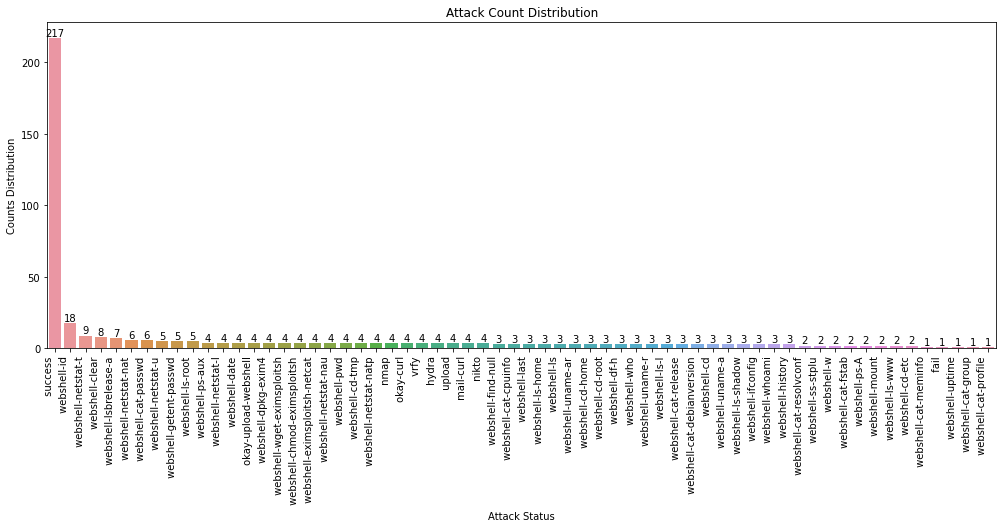

In [122]:
plt.figure(figsize = (17,6))
ax=sns.countplot(x=attack_data['Status'], order=attack_data["Status"].value_counts().index)
ax.bar_label(ax.containers[0])
#ax.bar_label(ax.containers[1])
plt.title('Attack Count Distribution')
plt.xlabel('Attack Status')
plt.ylabel('Counts Distribution')
plt.xticks(rotation = 90);
plt.show()

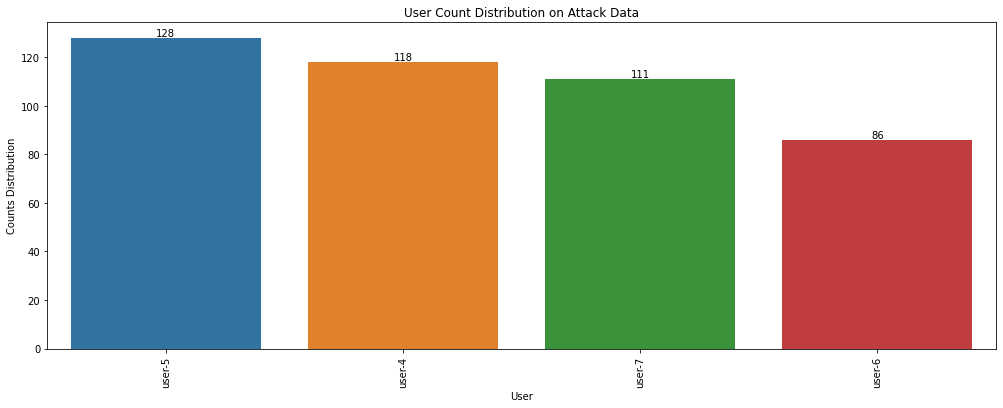

In [123]:
plt.figure(figsize = (17,6))
ax=sns.countplot(x=attack_data['User'], order=attack_data["User"].value_counts().index)
ax.bar_label(ax.containers[0])
#ax.bar_label(ax.containers[1])
plt.title('User Count Distribution on Attack Data')
plt.xlabel('User')
plt.ylabel('Counts Distribution')
plt.xticks(rotation = 90);
plt.show()

## Data for Dashboard

In [124]:
access_data.head()

,Ip_address,Date_Time,Method_of_request,Request_Method,Request_status,Referer_Header,User_Header,Security_status,Class_of_Request_status
0,192.168.10.190,2020-02-29,GET /login.php HTTP/1.1,GET,200,Anonymous Referer,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....,Safe,Successful
1,192.168.10.4,2020-02-29,POST /services/ajax.php/kronolith/listTopTags ...,POST,200,http://mail.cup.com/kronolith/,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,Safe,Successful
2,192.168.10.190,2020-02-29,POST /login.php HTTP/1.1,POST,302,http://mail.cup.com/login.php,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....,Safe,Found
3,192.168.10.190,2020-02-29,GET /services/portal/ HTTP/1.1,GET,200,http://mail.cup.com/login.php,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....,Safe,Successful
4,192.168.10.190,2020-02-29,GET /themes/default/graphics/head-bg.png HTTP/1.1,GET,200,http://mail.cup.com/themes/default/screen.css,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....,Safe,Successful


In [125]:
access_data.to_csv('access_data.csv')

In [126]:
error_log_data.head()

,Ip_address,Date_Time,PID,Referer_Header
0,192.168.10.4,Sun Mar 01,32548,http://mail.cup.com/nag/\n
1,192.168.10.4,Sun Mar 01,32548,http://mail.cup.com/nag/\n
2,192.168.10.4,Sun Mar 01,32548,http://mail.cup.com/nag/\n
3,192.168.10.4,Sun Mar 01,32548,http://mail.cup.com/nag/\n
4,192.168.10.4,Sun Mar 01,32548,http://mail.cup.com/nag/\n


In [127]:
error_log_data.to_csv('error_log_data.csv')

In [128]:
user_data.head()

,Date_Time,Date_id,Next_State,User
0,2020-02-28,123111,Login\n,user-0
1,2020-02-28,244144,Personal Preferences\n,user-0
2,2020-02-28,950956,Mail Delete Preferences\n,user-0
3,2020-02-28,522902,Home\n,user-0
4,2020-02-28,807088,MenuBarSelection\n,user-0


In [129]:
user_data.to_csv('user_data.csv')

In [130]:
attack_data.head()

,Date_Time,Status,User
0,Wed Mar 4 12:37:51,okay-upload-webshell\n,user-4
1,Wed Mar 4 12:37:51,success\n,user-4
2,Wed Mar 4 12:38:05,okay-curl\n,user-4
3,Wed Mar 4 12:38:05,success\n,user-4
4,Wed Mar 4 13:51:47,nmap\n,user-4


In [131]:
attack_data.to_csv('attack_data.csv')